# CALCOLO OPINION LEADER

### Importazione librerire e dataframes

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from tabulate import tabulate

In [3]:
tweet_users = pd.read_csv("../datasets/twitter/twitter_users.csv")
tweet_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")
# Importazione picco negativo
tweets_picco_0_neg = pd.read_csv("../dataframes/tweets_filtrati_picco_0_negativo_token_9032.csv")
# Importazione picchi positivi
tweets_picco_0_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_0_token_6563.csv")
tweets_picco_1_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_1_token_4037.csv")
tweets_picco_2_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_2_token_12247.csv")
tweets_picco_3_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_3_token_8898.csv")
tweets_picco_4_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_4_token_4704.csv")

### Merge dei tweet e la descrizione degli autori di tali tweet per ogni picco

In [4]:
merge_data_neg_0_description = pd.merge(tweets_picco_0_neg, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_neg = pd.merge(merge_data_neg_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_0_description = pd.merge(tweets_picco_0_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_pos = pd.merge(merge_data_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_1_description = pd.merge(tweets_picco_1_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_1_pos = pd.merge(merge_data_1_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_2_description = pd.merge(tweets_picco_2_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_2_pos = pd.merge(merge_data_2_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_3_description = pd.merge(tweets_picco_3_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_3_pos = pd.merge(merge_data_3_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_4_description = pd.merge(tweets_picco_4_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_4_pos = pd.merge(merge_data_4_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

# Token negativo 9032

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 9032

Utilizzo il metodo della silhoutte per trovare qual'è il miglior k (ossia il miglior numero di cluster) per la riuscita della ricerca

In [5]:
# Colonne rilevanti per il clustering
X = merge_0_neg[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcolo per i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_neg['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}
merge_0_neg['opinion_leader'] = merge_0_neg['cluster'].map(cluster_mapping)


Per n_clusters = 2, la media silhouette_score è: 0.9934366165486519
Per n_clusters = 3, la media silhouette_score è: 0.9873122318436764
Per n_clusters = 4, la media silhouette_score è: 0.979974796885924


Troviamo quindi che k=2 ha il valore di sihlouette migliore per la clusterizzazione di questo dataframe, per questo utilizziamo solo due classi (top OL e weak OL)

### GRAFICO K-MEANS per token 9032

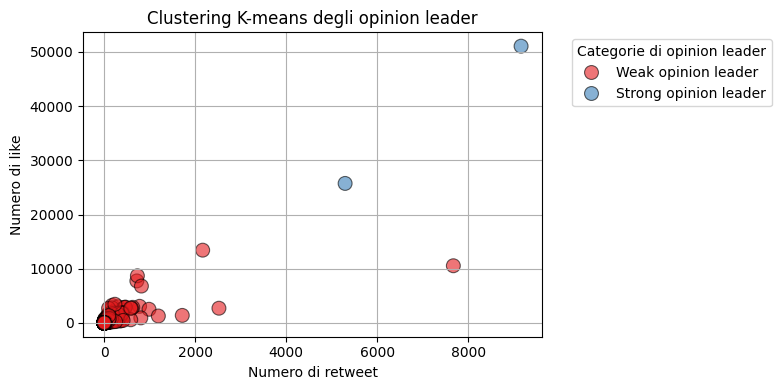

In [6]:
plt.figure(figsize = (8, 4))
sns.scatterplot(
    data = merge_0_neg,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black'
)

plt.xlabel('Numero di retweet')
plt.ylabel('Numero di like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [7]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_0_neg[merge_0_neg['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 2

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1346168171187863553, Numero di tweet: 1
Autor ID: 942461740041801733, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                              | Description                                                                                                                                                  | Sentiment   | Collection   |
+=================+==============+=======

# Token positivo 6563

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 6563

In [8]:
# Colonne rilevanti per il clustering
X = merge_0_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'} 
merge_0_pos['opinion_leader'] = merge_0_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9842941068839618
Per n_clusters = 3, la media silhouette_score è: 0.963584852098141
Per n_clusters = 4, la media silhouette_score è: 0.8924131062556514


##### GRAFICO K-MEANS per token 6563

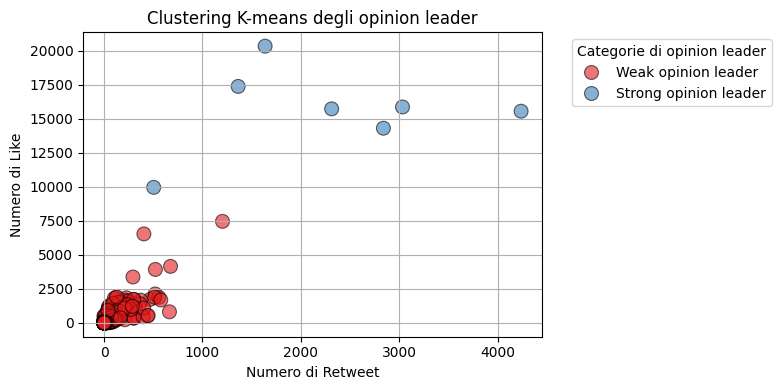

In [9]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_0_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette ='Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [10]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_0_pos[merge_0_pos['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 7

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1374890890179710979, Numero di tweet: 1
Autor ID: 1096947589755428864, Numero di tweet: 1
Autor ID: 2954090659, Numero di tweet: 1
Autor ID: 1366597668525379587, Numero di tweet: 1
Autor ID: 426499821, Numero di tweet: 1
Autor ID: 14130366, Numero di tweet: 1
Autor ID: 1368184198138322946, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Coun

# Token positivo 4037

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 4037

In [11]:
# Colonne rilevanti per il clustering
X = merge_1_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_1_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'} 
merge_1_pos['opinion_leader'] = merge_1_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9830652848432722
Per n_clusters = 3, la media silhouette_score è: 0.9301996443391447
Per n_clusters = 4, la media silhouette_score è: 0.8993435781759644


### GRAFICO K-MEANS per token 4037

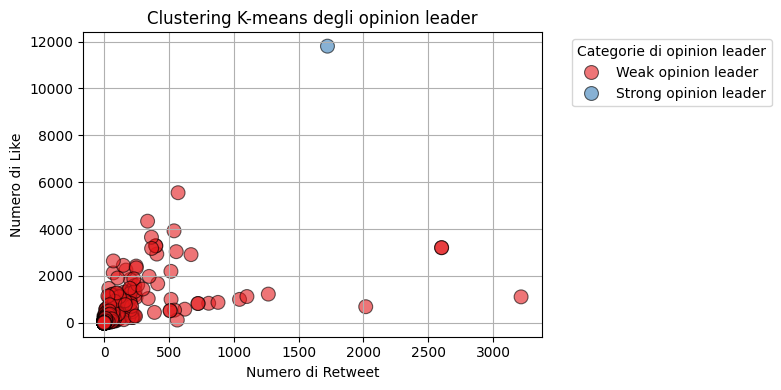

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_1_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [13]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_1_pos[merge_1_pos['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 1

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1025339104865730560, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                              | Description                                                                                                                                             | Sentiment   | Collection   |
+=================+==============+===============+===============+=====================+============

# Token positivo 12247

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 12247

In [14]:
# Colonne rilevanti per il clustering
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}
merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9195794313364481
Per n_clusters = 3, la media silhouette_score è: 0.8712150593877823
Per n_clusters = 4, la media silhouette_score è: 0.8478248380248247


### GRAFICO K-MEANS per token 12247

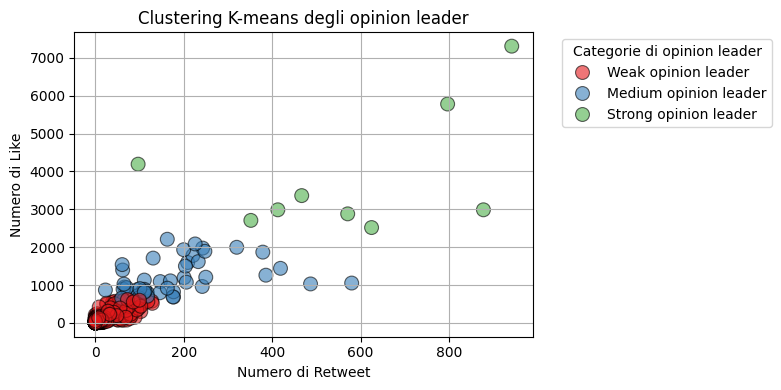

In [16]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_2_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [17]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_2_pos[merge_2_pos['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 9

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1212085986726797312, Numero di tweet: 1
Autor ID: 3226609357, Numero di tweet: 1
Autor ID: 932069874867642368, Numero di tweet: 1
Autor ID: 1009004130579304448, Numero di tweet: 1
Autor ID: 245245284, Numero di tweet: 1
Autor ID: 721297713116090368, Numero di tweet: 1
Autor ID: 1125300004380274688, Numero di tweet: 1
Autor ID: 370517645, Numero di tweet: 1
Autor ID: 129707325, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+--------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quo

cluster
0    915
2     49
1      9
Name: count, dtype: int64
cluster
0    915
1     49
2      9
Name: count, dtype: int64
[0 1 2]


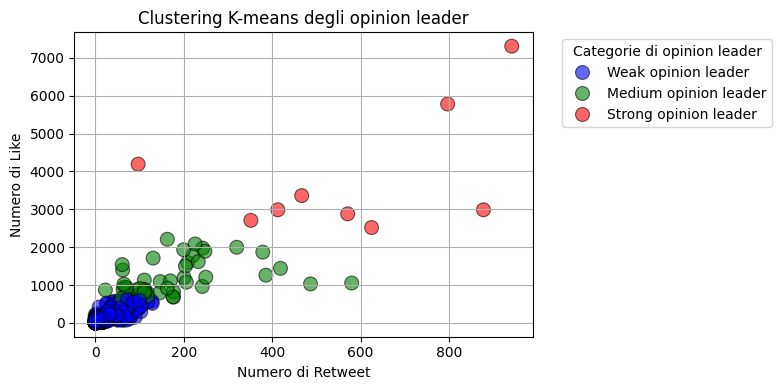

In [25]:
# Colonne rilevanti per il clustering
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]
 
# Imposta il numero di cluster a 3
k = 3
 
# Applica il metodo k-means con k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)
 
# Verifica i cluster creati
print(merge_2_pos['cluster'].value_counts())
 
# Definisci l'ordine desiderato dei cluster
desired_order = [0, 1, 2]
 
# Riassegna i cluster in base all'ordine desiderato
merge_2_pos['cluster'] = merge_2_pos['cluster'].replace({2: 1, 1: 2})
 
# Verifica i cluster dopo la riassegnazione
print(merge_2_pos['cluster'].value_counts())
 
# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Medium opinion leader', 2: 'Strong opinion leader'}
 
# Se i cluster non sono 0, 1, 2, cambia il mapping di conseguenza
print(merge_2_pos['cluster'].unique())
 
# Assegna le etichette ai cluster
merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)
 
palette = {'Weak opinion leader': 'blue', 'Medium opinion leader': 'green', 'Strong opinion leader': 'red'}
 
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=merge_2_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette=palette,
    s=100,
    alpha=0.6,
    edgecolor='black'
)
 
plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Token positivo 8898

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 8898

In [18]:
# Colonne rilevanti per il clustering
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'} 
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9418875233812839
Per n_clusters = 3, la media silhouette_score è: 0.8959531001024026
Per n_clusters = 4, la media silhouette_score è: 0.8509388924421342


### GRAFICO K-MEANS per token 8898

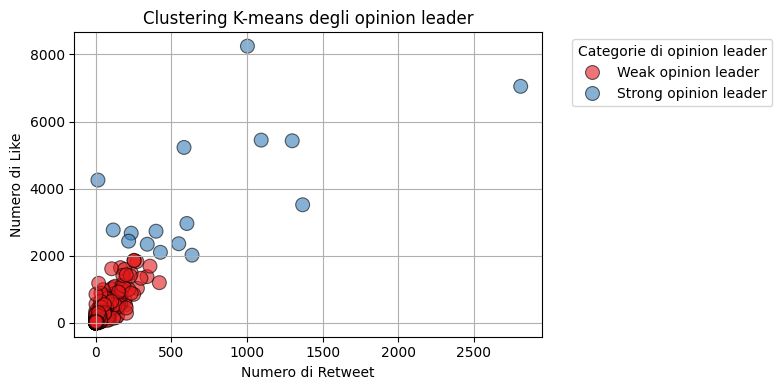

In [19]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_3_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [20]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_3_pos[merge_3_pos['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 16

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1118098069352935424, Numero di tweet: 1
Autor ID: 1365820730630365185, Numero di tweet: 1
Autor ID: 922379257971580929, Numero di tweet: 1
Autor ID: 1901850734, Numero di tweet: 1
Autor ID: 857223839628972032, Numero di tweet: 1
Autor ID: 377916273, Numero di tweet: 1
Autor ID: 2171018338, Numero di tweet: 1
Autor ID: 1108246657752137728, Numero di tweet: 1
Autor ID: 1380064426074595330, Numero di tweet: 1
Autor ID: 1334570033754693633, Numero di tweet: 1
Autor ID: 1057000964832534532, Numero di tweet: 1
Autor ID: 1161351170742521856, Numero di tweet: 1
Autor ID: 152465691, Numero di tweet: 1
Autor ID: 1346503770, Numero di tweet: 1
Autor ID: 282881255, Numero di tweet: 1
Autor ID: 1091694725994815489, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+------------------

cluster
0    1081
1      44
2       6
Name: count, dtype: int64
cluster
0    1081
1      44
2       6
Name: count, dtype: int64
[0 1 2]


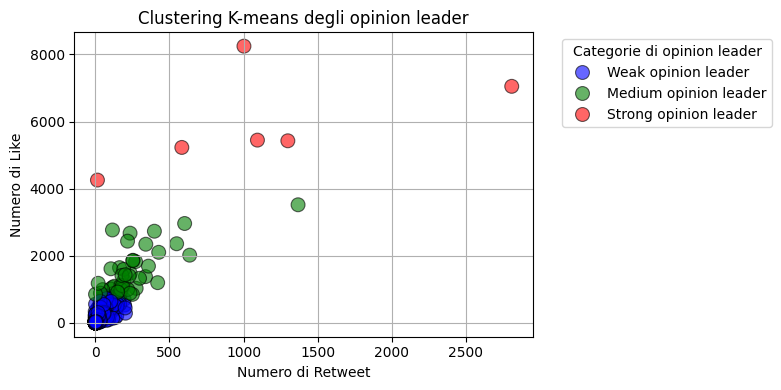

In [26]:
# Colonne rilevanti per il clustering
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]
 
# Imposta il numero di cluster a 3
k = 3
 
# Applica il metodo k-means con k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)
 
# Verifica i cluster creati
print(merge_3_pos['cluster'].value_counts())
 
# Verifica i cluster dopo la riassegnazione
print(merge_3_pos['cluster'].value_counts())
 
# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Medium opinion leader', 2: 'Strong opinion leader'}
 
# Se i cluster non sono 0, 1, 2, cambia il mapping di conseguenza
print(merge_3_pos['cluster'].unique())
 
# Assegna le etichette ai cluster
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)
 
palette = {'Weak opinion leader': 'blue', 'Medium opinion leader': 'green', 'Strong opinion leader': 'red'}
 
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=merge_3_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette=palette,
    s=100,
    alpha=0.6,
    edgecolor='black'
)
 
plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Token positivo 4704

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 4704

In [21]:
# Colonne rilevanti per il clustering
X = merge_4_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_4_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  
merge_4_pos['opinion_leader'] = merge_4_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9898637972404183
Per n_clusters = 3, la media silhouette_score è: 0.9557721394173333
Per n_clusters = 4, la media silhouette_score è: 0.9518495320820443


### GRAFICO K-MEANS per token 4704

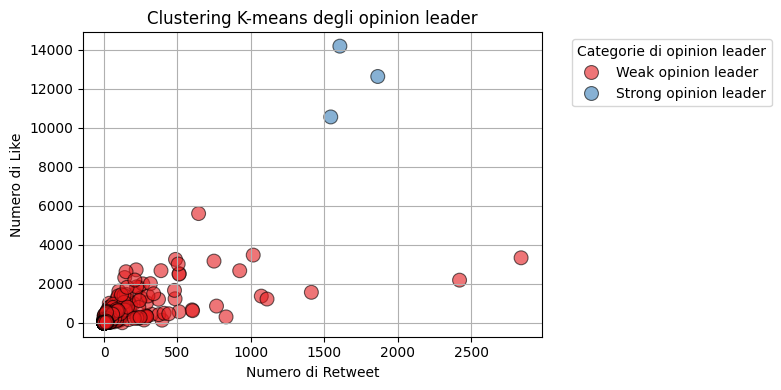

In [22]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data = merge_4_pos,
    x = 'retweet_count',
    y = 'like_count',
    hue = 'opinion_leader',
    palette = 'Set1',
    s = 100,
    alpha = 0.6,
    edgecolor = 'black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

In [23]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_4_pos[merge_4_pos['opinion_leader'] == 'Strong opinion leader']

# Conta e stampa il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta e stampa il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 3

Numero di tweet per ciascun strong opinion leader:
Autor ID: 871380288420667392, Numero di tweet: 1
Autor ID: 1043185714437992449, Numero di tweet: 1
Autor ID: 176228082, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+-------------+--------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                                                            | Description                                                                                    | Sentiment   | Collection   |
+=================+==============+===============+===============